# Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Data Preprocessing
# Load The Data Set

In [2]:
df = pd.read_csv('/kaggle/input/top-100-youtube-channels-in-2024/YOUTUBE CHANNELS DATASET.csv')

In [3]:
df.head()

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN


In [4]:
df.isna().sum()

Ranking        1
Username       1
Subscribers    1
Uploads        1
Views          1
Country        7
dtype: int64

In [5]:
if df.iloc[-1].isnull().all():
    df = df.iloc[:-1]

In [6]:
df['Country'] = df['Country'].fillna(method='ffill').fillna(method='bfill')

In [7]:
df.isna().sum()

Ranking        0
Username       0
Subscribers    0
Uploads        0
Views          0
Country        0
dtype: int64

In [8]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [9]:
df=pd.get_dummies(df,columns=['Country'])

In [10]:
def convert_subscribers(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    return float(value)

df['Subscribers'] = df['Subscribers'].apply(convert_subscribers)

In [11]:
def convert_value(value):
    
    value = value.replace(',', '')
    
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    return float(value)

df['Views'] = df['Views'].apply(convert_value)
df['Uploads'] = df['Uploads'].apply(convert_value)

In [12]:
df.dtypes

Ranking        float64
Username        object
Subscribers    float64
Uploads        float64
Views          float64
Country_AE        bool
Country_AR        bool
Country_BR        bool
Country_CA        bool
Country_CL        bool
Country_CO        bool
Country_ES        bool
Country_GB        bool
Country_ID        bool
Country_IN        bool
Country_IT        bool
Country_JP        bool
Country_KR        bool
Country_MX        bool
Country_NO        bool
Country_PH        bool
Country_PK        bool
Country_PR        bool
Country_PT        bool
Country_RU        bool
Country_SV        bool
Country_TR        bool
Country_US        bool
dtype: object

In [13]:
df.head(10)

,Ranking,Username,Subscribers,Uploads,Views,Country_AE,Country_AR,Country_BR,Country_CA,Country_CL,...,Country_MX,Country_NO,Country_PH,Country_PK,Country_PR,Country_PT,Country_RU,Country_SV,Country_TR,Country_US
0,1.0,MrBeast,336000000.0,838.0,6.685363e+10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,T-Series,281000000.0,22313.0,2.772428e+11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,Cocomelon-Nursery Rhymes,186000000.0,1370.0,1.943618e+11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4.0,Youtube Movies,185000000.0,0.0,0.000000e+00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5.0,Set India,180000000.0,148727.0,1.727090e+11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6.0,Vlad & Niki,129000000.0,796.0,9.929150e+10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,7.0,Kids Diana Show,128000000.0,1282.0,1.089879e+11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8.0,Like Nastya,124000000.0,918.0,1.081285e+11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,9.0,Music,121000000.0,0.0,0.000000e+00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,10.0,Zee Music Company,112000000.0,12787.0,7.209135e+10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.describe()

,Ranking,Subscribers,Uploads,Views
count,100.000000,1.000000e+02,100.000000,1.000000e+02
mean,50.500000,7.323800e+07,25681.220000,4.054367e+10
std,29.011492,4.449087e+07,72524.113223,4.033800e+10
min,1.000000,4.550000e+07,0.000000,0.000000e+00
25%,25.750000,5.005000e+07,717.250000,1.964624e+10
50%,50.500000,5.995000e+07,1891.000000,3.078494e+10
75%,75.250000,7.447500e+07,7028.000000,4.472049e+10
max,100.000000,3.360000e+08,433181.000000,2.772428e+11


In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df.head()

,Ranking,Username,Subscribers,Uploads,Views,Country_AE,Country_AR,Country_BR,Country_CA,Country_CL,...,Country_MX,Country_NO,Country_PH,Country_PK,Country_PR,Country_PT,Country_RU,Country_SV,Country_TR,Country_US
0,-1.714816,MrBeast,5.935729,-0.344277,0.655523,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.680173,T-Series,4.693293,-0.046677,5.897456,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.645531,Cocomelon-Nursery Rhymes,2.547266,-0.336904,3.832441,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.610888,Youtube Movies,2.524676,-0.355890,-1.010162,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.576245,Set India,2.411727,1.705166,3.292954,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from scipy import stats
z_scores = stats.zscore(df[numerical_cols])
df = df[(z_scores < 3).all(axis=1)] 

In [18]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 12 to 99
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ranking      73 non-null     float64
 1   Username     73 non-null     object 
 2   Subscribers  73 non-null     float64
 3   Uploads      73 non-null     float64
 4   Views        73 non-null     float64
 5   Country_AE   73 non-null     bool   
 6   Country_AR   73 non-null     bool   
 7   Country_BR   73 non-null     bool   
 8   Country_CA   73 non-null     bool   
 9   Country_CL   73 non-null     bool   
 10  Country_CO   73 non-null     bool   
 11  Country_ES   73 non-null     bool   
 12  Country_GB   73 non-null     bool   
 13  Country_ID   73 non-null     bool   
 14  Country_IN   73 non-null     bool   
 15  Country_IT   73 non-null     bool   
 16  Country_JP   73 non-null     bool   
 17  Country_KR   73 non-null     bool   
 18  Country_MX   73 non-null     bool   
 19  Country_NO   7

# EDA (Visualization)

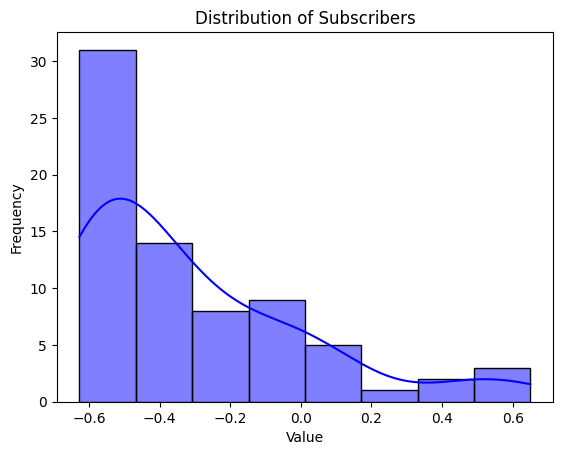

In [20]:
# Histogram for a Subscribers
sns.histplot(df['Subscribers'], kde=True, color="Blue")
plt.title('Distribution of Subscribers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

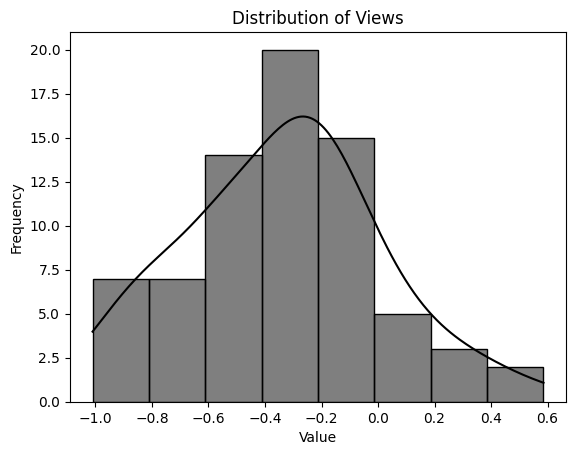

In [21]:
# Histogram for a Views
sns.histplot(df['Views'], kde=True,color='Black')
plt.title('Distribution of Views')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

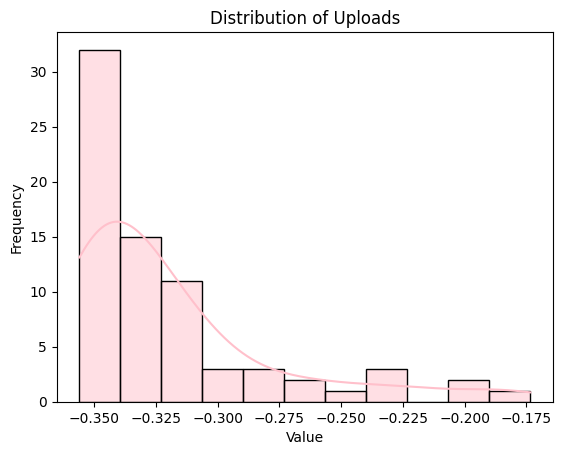

In [22]:
# Histogram for a Uploads
sns.histplot(df['Uploads'], kde=True,color='pink')
plt.title('Distribution of Uploads')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

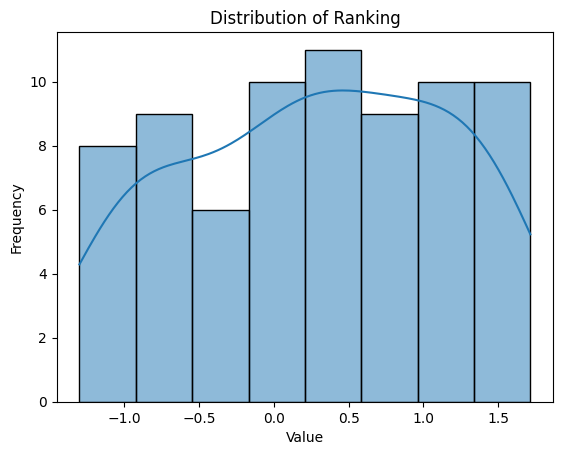

In [23]:
# Histogram for a Ranking
sns.histplot(df['Ranking'], kde=True)
plt.title('Distribution of Ranking')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [24]:
print(df.columns)

Index(['Ranking', 'Username', 'Subscribers', 'Uploads', 'Views', 'Country_AE',
       'Country_AR', 'Country_BR', 'Country_CA', 'Country_CL', 'Country_CO',
       'Country_ES', 'Country_GB', 'Country_ID', 'Country_IN', 'Country_IT',
       'Country_JP', 'Country_KR', 'Country_MX', 'Country_NO', 'Country_PH',
       'Country_PK', 'Country_PR', 'Country_PT', 'Country_RU', 'Country_SV',
       'Country_TR', 'Country_US'],
      dtype='object')


In [25]:
df.columns = df.columns.str.strip()

In [26]:
country_columns = [col for col in df.columns if col.startswith('Country_')]
df['Country'] = df[country_columns].idxmax(axis=1).str.replace('Country_', '')

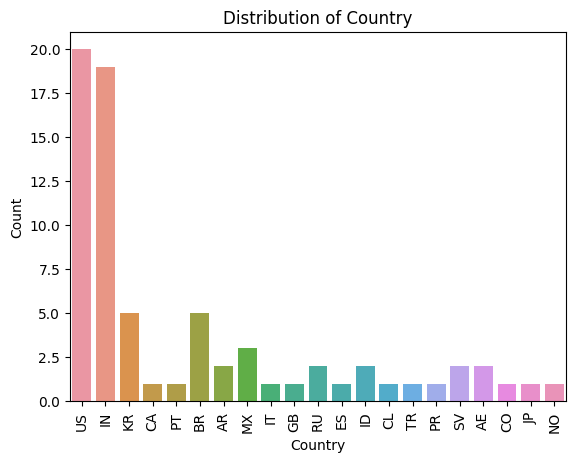

In [27]:
sns.countplot(x='Country', data=df)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

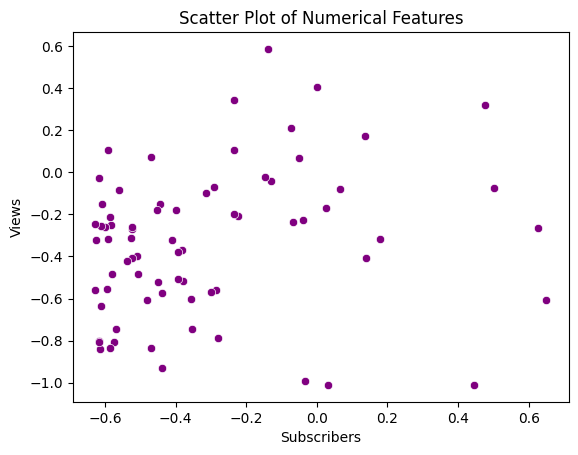

In [28]:
# Scatter plot for two numerical columns
sns.scatterplot(x='Subscribers', y='Views', data=df,color='Purple')
plt.title('Scatter Plot of Numerical Features')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show()

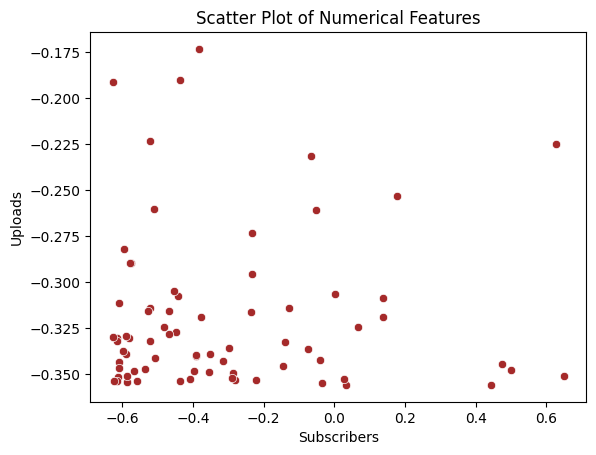

In [29]:
sns.scatterplot(x='Subscribers', y='Uploads', data=df,color='Brown')
plt.title('Scatter Plot of Numerical Features')
plt.xlabel('Subscribers')
plt.ylabel('Uploads')
plt.show()

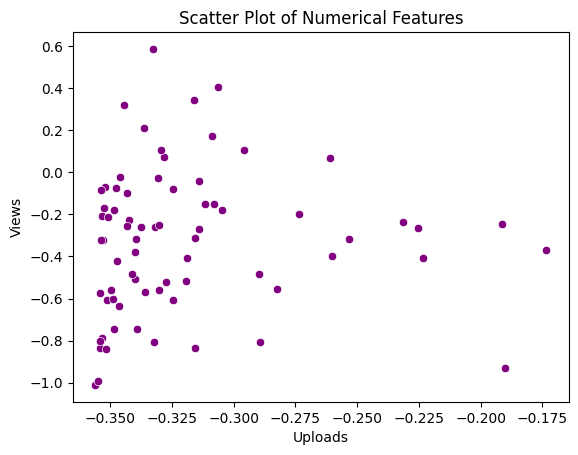

In [30]:
sns.scatterplot(x='Uploads', y='Views', data=df,color='Purple')
plt.title('Scatter Plot of Numerical Features')
plt.xlabel('Uploads')
plt.ylabel('Views')
plt.show()

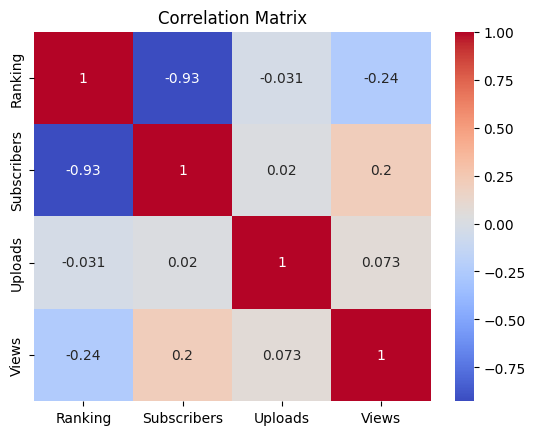

In [31]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

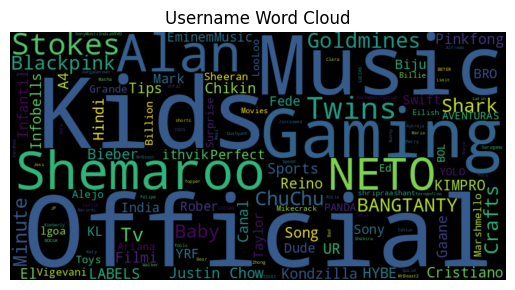

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Username']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Username Word Cloud")
plt.show()

In [33]:
target_column = 'Subscribers'
X = df.drop(columns=[target_column])
y = df[target_column]

# Model Evaluation
# 01:Linear Regression (regressor)
# 02:Decision Tree (regressor)

In [34]:
categorical_cols = X.select_dtypes(include=['object']).columns

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

In [37]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.03253165815201864
Mean Absolute Error: 0.11621995773106171


In [38]:
# Hyperparameter Tuning
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [39]:
# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate with best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.03253165815201864


In [40]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.0036154828785839054
Mean Absolute Error (MAE): 0.04314643243425074


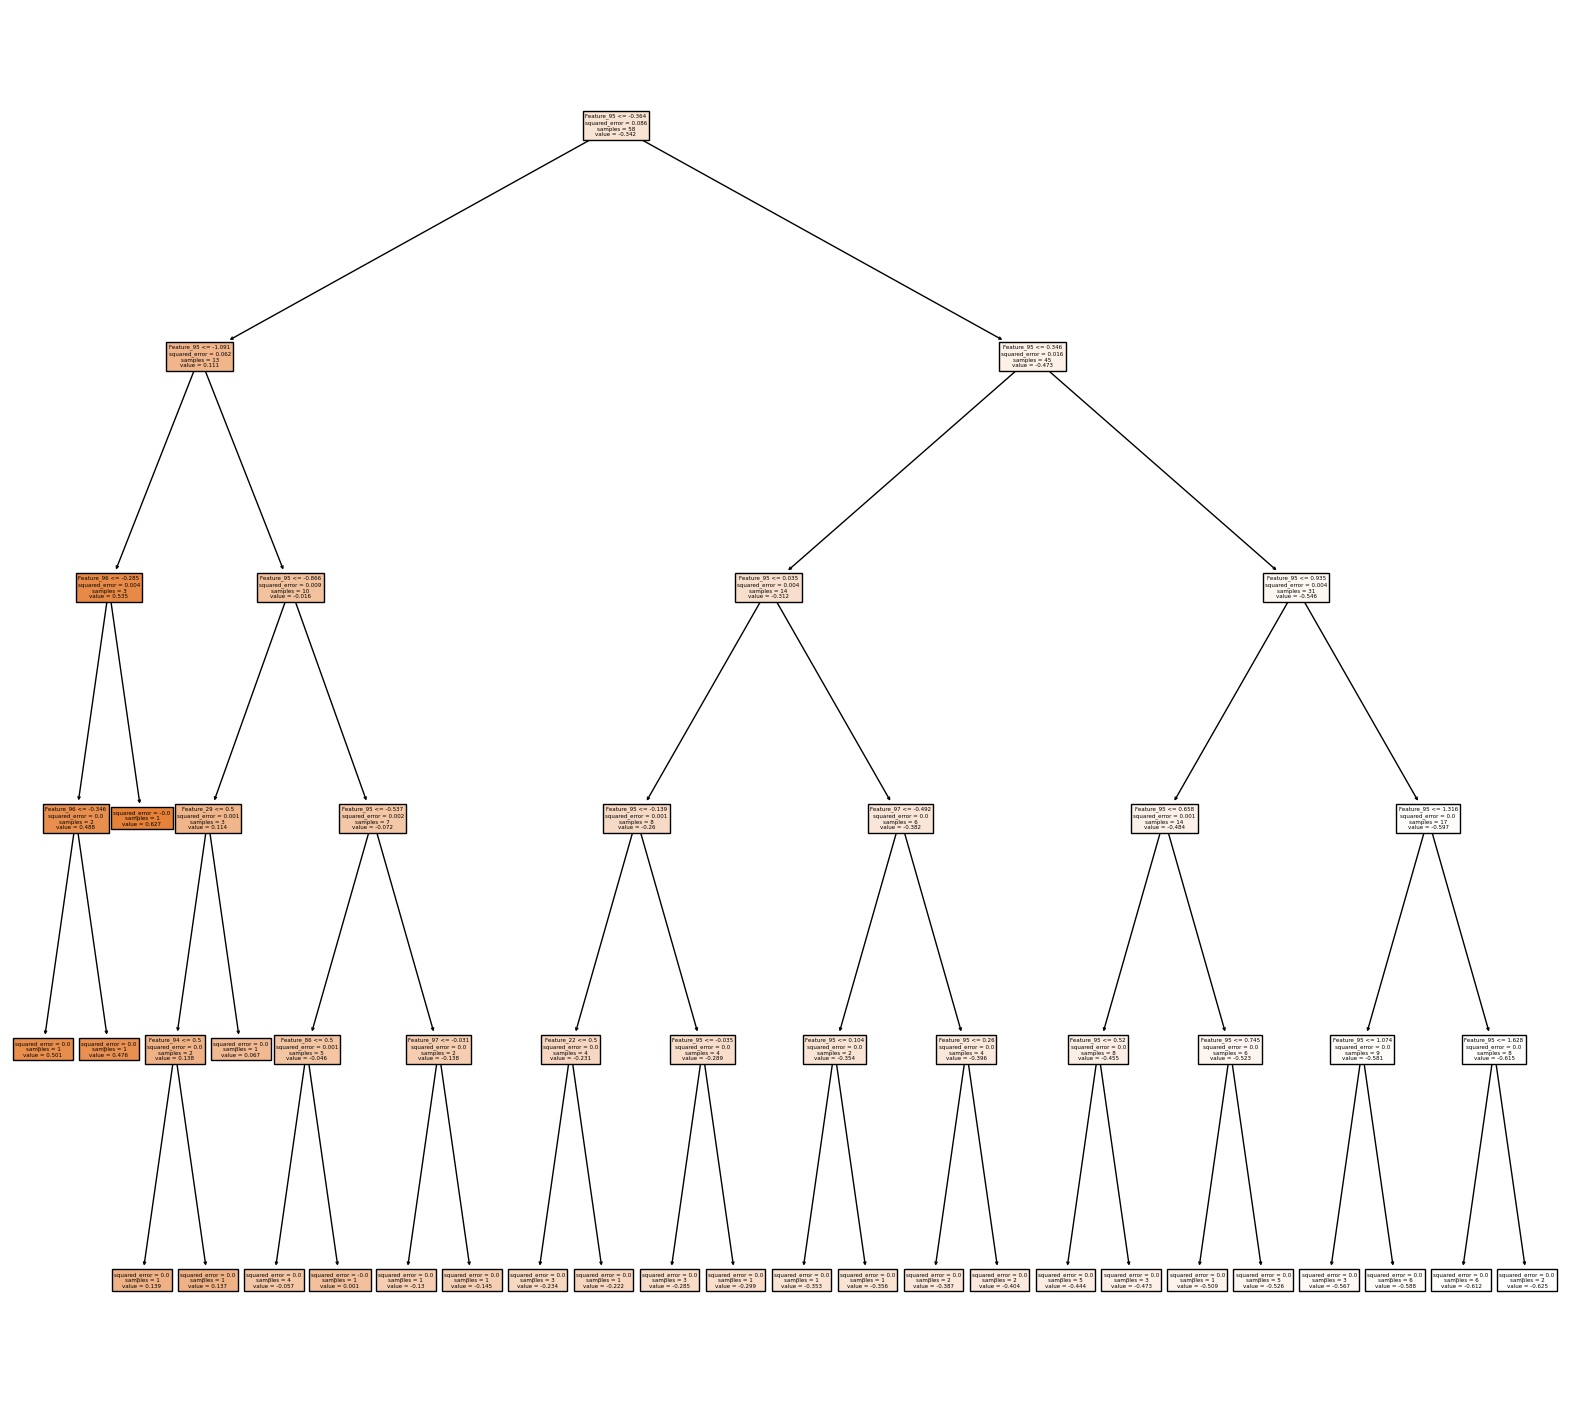

In [42]:
# Automatically generate feature names
X_dense = pd.DataFrame(X.toarray(), columns=[f"Feature_{i+1}" for i in range(X.shape[1])])

# Plot the decision tree
plt.figure(figsize=(20, 18))
plot_tree(dt_model, feature_names=X_dense.columns, filled=True)
plt.show()

In [43]:
# Define your model
dt_model = DecisionTreeRegressor()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [44]:
# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [45]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (Negative MSE): -0.001200133588688966


In [46]:
# Use the best estimator (model with best parameters)
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Optimized Mean Squared Error: {mse}")
print(f"Optimized Mean Absolute Error: {mae}")

Optimized Mean Squared Error: 0.002926383425668623
Optimized Mean Absolute Error: 0.0346376246418069


In [47]:
# Define models
dt_model = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
lr_model = LinearRegression(fit_intercept=True)

# Train both models
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions with both models
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate both models using Mean Squared Error and Mean Absolute Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [48]:
# Print the results for comparison
print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")

print("\nLinear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")

Decision Tree Regressor:
Mean Squared Error (MSE): 0.0032009232332150745
Mean Absolute Error (MAE): 0.036595403425909015

Linear Regression:
Mean Squared Error (MSE): 0.03253165815201864
Mean Absolute Error (MAE): 0.11621995773106171


In [49]:
# Plot Predictions vs Actual values for both models
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

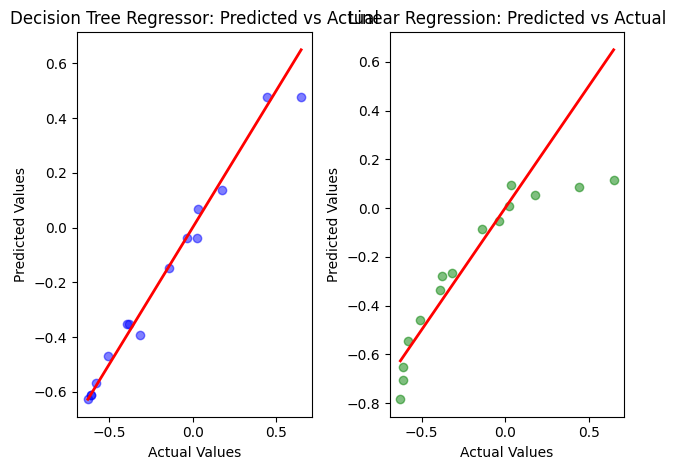

In [50]:
# Plot for Decision Tree Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Decision Tree Regressor: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Plot for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

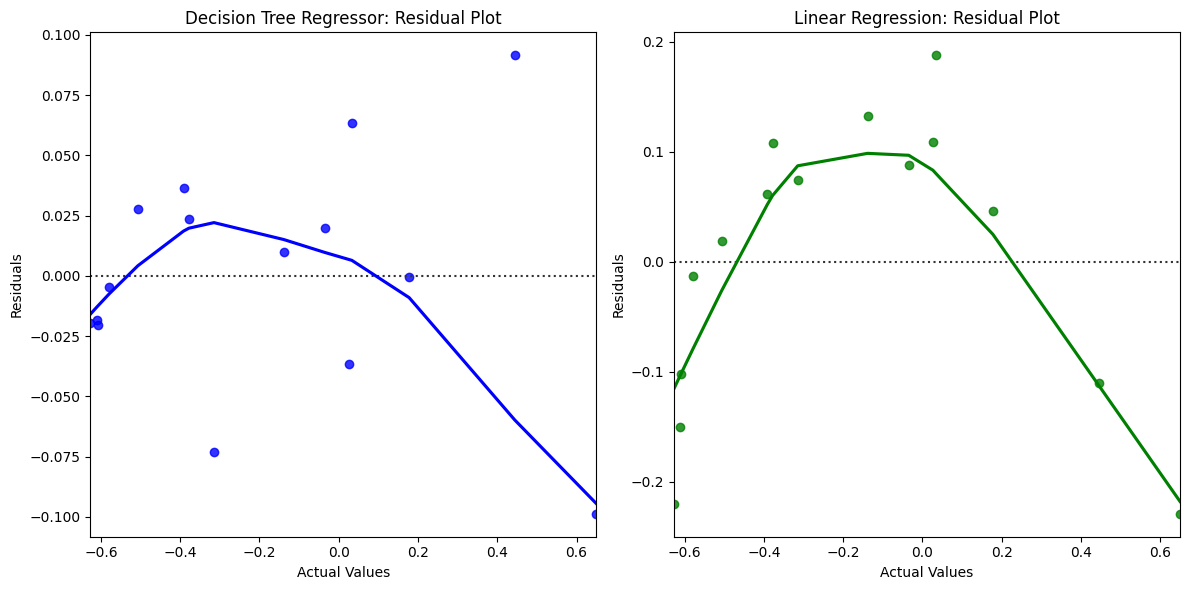

In [51]:
# Plot residuals for both models
plt.figure(figsize=(12, 6))

# Residual plot for Decision Tree Regressor
plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred_dt, lowess=True, color='blue')
plt.title("Decision Tree Regressor: Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

# Residual plot for Linear Regression
plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='green')
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

In [52]:
import joblib

# Save Decision Tree Regressor model
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Save Linear Regression model
joblib.dump(lr_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [53]:
import os
print(os.path.isfile('decision_tree_model.pkl'))

True
